# Basic visualization of the raw dataset

In this notebook, we will take a look at the raw FV3 dataset with some cool visualizations.

**Attention**: The animations are quite big, so they shouldn't be commited to the github repo. Please clear the output if you are commiting changes in theis notebook.

In [134]:
import xarray as xr
import matplotlib.pyplot as plt
# Necessary to supress annying matplotlib warnings
import warnings
import matplotlib
warnings.filterwarnings("ignore",category=matplotlib.MatplotlibDeprecationWarning)

## Load the data

The 2D and 3D data are stored in separate files with different outoput time steps. They are saved in the Zarr format.

In [94]:
data_2d = xr.open_zarr("/home/noahb/data/2019-07-17-GFDL_FV3_DYAMOND_0.25deg_15minute/2d.zarr/")

In [95]:
data_3d = xr.open_zarr("/home/noahb/data/2019-07-17-GFDL_FV3_DYAMOND_0.25deg_15minute/3d.zarr/")

In [99]:
data_2d

<xarray.Dataset>
Dimensions:       (bnds: 2, grid_xt: 1536, grid_yt: 768, time: 48)
Coordinates:
  * grid_xt       (grid_xt) float32 0.1171875 0.3515625 ... 359.64844 359.8828
  * grid_yt       (grid_yt) float32 -89.88281 -89.64844 ... 89.64844 89.88281
  * time          (time) object 2016-08-01 00:15:00 ... 2016-08-01 12:00:00
Dimensions without coordinates: bnds
Data variables:
    cape          (time, grid_yt, grid_xt) float32 dask.array<shape=(48, 768, 1536), chunksize=(48, 768, 1536)>
    cin           (time, grid_yt, grid_xt) float32 dask.array<shape=(48, 768, 1536), chunksize=(48, 768, 1536)>
    cldc          (time, grid_yt, grid_xt) float32 dask.array<shape=(48, 768, 1536), chunksize=(48, 768, 1536)>
    flds          (time, grid_yt, grid_xt) float32 dask.array<shape=(48, 768, 1536), chunksize=(48, 768, 1536)>
    flus          (time, grid_yt, grid_xt) float32 dask.array<shape=(48, 768, 1536), chunksize=(48, 768, 1536)>
    flut          (time, grid_yt, grid_xt) float32 dask.a

In [5]:
data_3d

<xarray.Dataset>
Dimensions:       (bnds: 2, grid_xt: 1536, grid_yt: 768, pfull: 79, phalf: 80, plev: 31, time: 4)
Coordinates:
  * grid_xt       (grid_xt) float32 0.1171875 0.3515625 ... 359.64844 359.8828
  * grid_yt       (grid_yt) float32 -89.88281 -89.64844 ... 89.64844 89.88281
  * pfull         (pfull) float32 4.5137978 8.300872 ... 994.3374 998.2764
  * phalf         (phalf) float32 3.0 6.4671593 10.452223 ... 996.5372 1000.0
  * plev          (plev) float32 1.0 2.0 3.0 5.0 ... 925.0 950.0 975.0 1000.0
  * time          (time) object 2016-08-01 03:00:00 ... 2016-08-01 12:00:00
Dimensions without coordinates: bnds
Data variables:
    grid_xt_bnds  (grid_xt, bnds) float32 dask.array<shape=(1536, 2), chunksize=(1536, 2)>
    grid_yt_bnds  (grid_yt, bnds) float32 dask.array<shape=(768, 2), chunksize=(768, 2)>
    h_plev        (time, plev, grid_yt, grid_xt) float32 dask.array<shape=(4, 31, 768, 1536), chunksize=(4, 31, 768, 1536)>
    pres          (time, pfull, grid_yt, grid_xt) f

In [106]:
data_2d.grid_xt.diff(dim='grid_xt')

<xarray.DataArray 'grid_xt' (grid_xt: 1535)>
array([0.234375, 0.234375, 0.234375, ..., 0.234375, 0.234375, 0.234375],
      dtype=float32)
Coordinates:
  * grid_xt  (grid_xt) float32 0.3515625 0.5859375 ... 359.64844 359.8828

In [108]:
data_2d.grid_yt.diff(dim='grid_yt')

<xarray.DataArray 'grid_yt' (grid_yt: 767)>
array([0.234375, 0.234375, 0.234375, ..., 0.234375, 0.234375, 0.234375],
      dtype=float32)
Coordinates:
  * grid_yt  (grid_yt) float32 -89.64844 -89.41406 ... 89.64844 89.88281

The 2D dataset has a 15 minute temporal resolution while the 3D data has 3 hourly resolution. 

The spatial resolution is 0.234375 degrees in both spatial directions.

## Understanding the vertical coordinate

This is quite a tricky one. There are several variables associated with the z-direction. First of all the 3D data comes with `pfull` and `plev` coordinates. We will only use `pfull` but in the next section I still explore what `plev` is.

In [109]:
data_3d.pfull

<xarray.DataArray 'pfull' (pfull: 79)>
array([  4.513798,   8.300872,  12.451992,  16.743742,  21.043724,  25.338402,
        29.674856,  34.147163,  38.86913 ,  43.96602 ,  49.5246  ,  55.561832,
        62.093155,  69.13202 ,  76.68984 ,  84.77605 ,  93.39774 , 102.560074,
       112.265205, 122.51394 , 133.30374 , 144.63077 , 156.4879  , 168.8669  ,
       181.7567  , 195.14442 , 209.01512 , 223.3527  , 238.13927 , 253.35498 ,
       268.97873 , 284.98923 , 301.3631  , 318.07578 , 335.10373 , 352.42053 ,
       370.00256 , 387.82196 , 405.8532  , 424.07086 , 442.4498  , 460.96283 ,
       479.58557 , 498.29193 , 517.059   , 535.8636  , 554.68066 , 573.48865 ,
       592.26697 , 610.993   , 629.64954 , 648.21484 , 666.6726  , 685.0066  ,
       703.18896 , 721.1846  , 738.9545  , 756.46246 , 773.6667  , 790.52576 ,
       807.004   , 823.06415 , 838.6636  , 853.76166 , 868.3317  , 882.3303  ,
       895.71643 , 908.47    , 920.54626 , 931.9229  , 942.559   , 952.4391  ,
       961.52

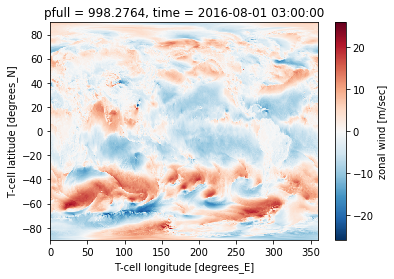

In [113]:
data_3d.u.isel(time=0, pfull=-1).plot();

Associated with `pfull` is a `pres` variable.

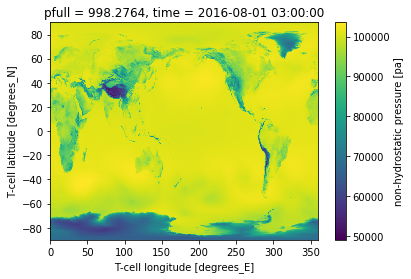

In [115]:
data_3d.pres.isel(time=0, pfull=-1).plot();

`pres` seems to be the actual pressure associated with each of the `pfull` levels.

### [Not relevant] Figuring out what plev is

THere are also a bunch of variables on a `plev` vertical coordinate. So what the hell is that?

In [110]:
data_3d.plev

<xarray.DataArray 'plev' (plev: 31)>
array([   1.,    2.,    3.,    5.,    7.,   10.,   20.,   30.,   50.,   70.,
        100.,  150.,  200.,  250.,  300.,  350.,  400.,  450.,  500.,  550.,
        600.,  650.,  700.,  750.,  800.,  850.,  900.,  925.,  950.,  975.,
       1000.], dtype=float32)
Coordinates:
  * plev     (plev) float32 1.0 2.0 3.0 5.0 7.0 ... 925.0 950.0 975.0 1000.0
Attributes:
    cartesian_axis:  Z
    long_name:       actual pressure level
    positive:        down
    units:           mb

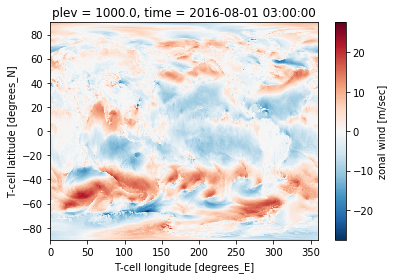

In [114]:
data_3d.u_plev.isel(time=0, plev=-1).plot();

So the field is defined at the surface even though `plev` claims to be actual pressure levels. 

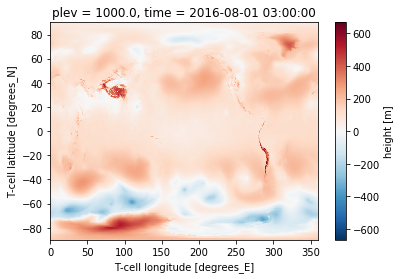

In [116]:
data_3d.h_plev.isel(time=0, plev=-1).plot();

But what the hell is `h_plev`? I guess it could be the interpolated height of each `plev`. Hmm, but that would often be below ground. So let's actually see what happens at Mt. Everest with has coordinates: 27.9881° N, 86.9250° E

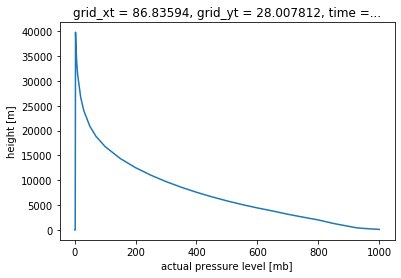

In [118]:
data_3d.h_plev.isel(time=0).sel(grid_xt=86.93, grid_yt=27.99, method='nearest').plot()

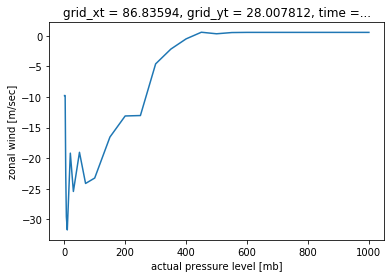

In [119]:
data_3d.u_plev.isel(time=0).sel(grid_xt=86.93, grid_yt=27.99, method='nearest').plot()

So it seems like they simply set the values "below" the model grid to a constant.

## Visualize and animate fields

Now let's look at the actual fields. We can plot those with the xarray plot function is shown above. But we can do much more. All these plots take a few seconds because the fields are actually quite large.

In [123]:
data_3d.w

<xarray.DataArray 'w' (time: 4, pfull: 79, grid_yt: 768, grid_xt: 1536)>
dask.array<shape=(4, 79, 768, 1536), dtype=float32, chunksize=(4, 79, 768, 1536)>
Coordinates:
  * grid_xt  (grid_xt) float32 0.1171875 0.3515625 ... 359.64844 359.8828
  * grid_yt  (grid_yt) float32 -89.88281 -89.64844 ... 89.64844 89.88281
  * pfull    (pfull) float32 4.5137978 8.300872 12.451992 ... 994.3374 998.2764
  * time     (time) object 2016-08-01 03:00:00 ... 2016-08-01 12:00:00
Attributes:
    cell_methods:   time: point
    interp_method:  conserve_order1
    long_name:      vertical wind
    units:          m/sec
    valid_range:    [-100.0, 100.0]

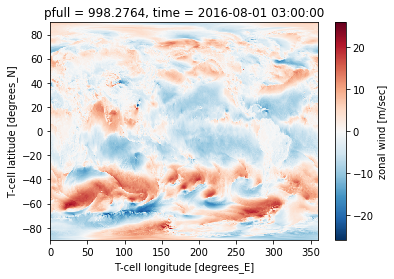

In [124]:
data_3d.u.isel(time=0, pfull=-1).plot()

### Interactive figures with holoviews and bokeh

So here are the steps to create an interaction figure.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
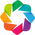

In [126]:
# Import holoviews and the bokeh extension
import holoviews as hv
hv.extension('bokeh')

In [128]:
# Convert the 2D xarray slice to a holoviews Image
hv_img = hv.Image(data_3d.w.isel(time=0, pfull=-20))
# hv_img = hv.Image(data_3d.w.isel(time=0, pfull=-20, grid_yt=slice(0, 100), grid_xt=slice(0, 100)))

In [129]:
# This is kind of ugly
# To set the colormap limits we have to change the dimension range of the variable to plot
hv_img = hv_img.redim(w=hv.Dimension('w', range=(-0.5, 0.5)))

In [ ]:
# Finally, we set the options and display the interactive plot. 
# You can interact with the plot with the buttons on the right.
hv_img.options(width=1000, cmap=plt.cm.RdBu, colorbar=True, aspect='equal')

### Interactive animations

We can also add the 4th dimension and create an animation. If the time dimension is large this can become a little hard for the notebook to handly, so I would suggest slicing the domain

In [148]:
# First, we need to create a holoviews dataset from our xarray dataarray
hv_ds = hv.Dataset(data_2d.pr.isel(grid_yt=slice(300, 600), grid_xt=slice(300, 1000)))

In [149]:
# Then convert this into a holoviews image, spoecifying the x and y. dimensions for the plot and the options.
hv_img = hv_ds.to(hv.Image, ['grid_xt', 'grid_yt']).options(colorbar=True, cmap=plt.cm.RdBu_r, 
                                                            aspect='equal', width=1000)

In [150]:
#hv_img = hv_img.redim(w=hv.Dimension('w', range=(-0.5, 0.5)))

In [ ]:
%%output holomap='scrubber'
# Set the output to scrubber to interact with the plot
hv_img

Quite beautiful I think.

## Plot with continents and different projections